In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
def plot_roc_curve(y_train, preds_train, y_test, preds_test):
    plt.plot(metrics.roc_curve(y_train, preds_train)[0], metrics.roc_curve(y_train, preds_train)[1],
             color = 'red', label='Train ROC Curve (area = %0.5f)' % roc_auc_score(y_train, preds_train))
    plt.plot(metrics.roc_curve(y_test, preds_test)[0],metrics.roc_curve(y_test, preds_test)[1],
             color = 'blue', label='Test ROC Curve (area = %0.5f)' % roc_auc_score(y_test, preds_test))
    plt.plot([0, 2], [0, 2], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend()
    plt.show()
    sns.set(style='white', rc={'figure.figsize':(10,10)})

In [3]:
def important_stats(y_true, y_pred_proba, summary):
    print("------------------------------------------")
    y_pred_label = pd.Series(y_pred_proba)
    y_pred_label = y_pred_label.map(lambda x: 1 if x > 0.5 else 0)
    print(summary)
    reacll = recall_score(y_true, y_pred_label)
    print('recall:', reacll)
    f1_stat = f1_score(y_true, y_pred_label)
    print('f1_score:', f1_stat)
    accuracyScore= accuracy_score(y_true, y_pred_label)
    print('accuracy_score:', accuracyScore)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_proba)
    auc = metrics.auc(fpr, tpr)
    print('AUC:', auc)
    matrix = pd.crosstab(y_true, y_pred_label, rownames=['True'], colnames=['Predicted'], margins=True)
    print(matrix)
    print("------------------------------------------")

In [4]:
df = pd.read_csv(f'{os.getcwd()}/data_clean/cleaned_match_data.csv')

In [5]:
df.head()

,Unnamed: 0,match_id,duration,result,top_towers,mid_towers,bottom_towers,ancient_status,top_barracks,mid_barracks,...,level_total,level_max,level_min,level_std,gold_buyback_avg,gold_buyback_max,gold_buyback_min,gold_buyback_std,teamfight_loss,has_negative_chat
0,0,0,2375,1,1,3,2,2,0,2,...,100,24,16,3.0332,-414.2,0.0,-1056.0,507.4550,1,True
1,1,0,2375,0,-1,-3,-2,-2,0,-2,...,84,19,12,2.6382,-668.4,0.0,-2240.0,884.9065,11,True
2,2,0,2375,1,1,3,2,2,0,2,...,100,24,16,3.0332,-414.2,0.0,-1056.0,507.4550,1,True
3,3,0,2375,0,-1,-3,-2,-2,0,-2,...,84,19,12,2.6382,-668.4,0.0,-2240.0,884.9065,11,True
4,4,1,2582,0,-2,-2,-1,-2,-2,-2,...,92,25,12,4.4091,-355.0,0.0,-1112.0,410.7768,10,False


In [6]:
df.shape

(97342, 54)

In [83]:
df.dtypes

Unnamed: 0              int64
match_id                int64
duration                int64
result                  int64
top_towers              int64
mid_towers              int64
bottom_towers           int64
ancient_status          int64
top_barracks            int64
mid_barracks            int64
bottom_barracks         int64
gold_total              int64
gold_max                int64
gold_min                int64
gold_std              float64
gold_spent_avg        float64
gold_spent_max          int64
gold_spent_min          int64
gold_spent_std        float64
kills_total             int64
deaths_total            int64
deaths_max              int64
deaths_min              int64
deaths_std            float64
assists_avg           float64
assists_max             int64
assists_min             int64
assists_std           float64
denies_avg            float64
denies_max              int64
denies_min              int64
denies_std            float64
last_hits_avg         float64
last_hits_

In [7]:
df.head()
df = df.drop(columns = ['match_id','Unnamed: 0'])

In [8]:
df.corr()

,duration,result,top_towers,mid_towers,bottom_towers,ancient_status,top_barracks,mid_barracks,bottom_barracks,gold_total,...,level_total,level_max,level_min,level_std,gold_buyback_avg,gold_buyback_max,gold_buyback_min,gold_buyback_std,teamfight_loss,has_negative_chat
duration,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230393,...,0.867513,0.776655,0.780949,0.063222,-0.585443,-0.213388,-0.602811,0.582065,0.242851,0.047286
result,0.000000,1.000000,0.780384,0.869120,0.825153,0.986854,0.809052,0.865915,0.942938,0.739365,...,0.320456,0.318169,0.293050,0.059137,0.189751,0.061799,0.161717,-0.154209,-0.565136,0.000000
top_towers,0.000000,0.780384,1.000000,0.807989,0.792817,0.790515,0.880293,0.752831,0.787292,0.548157,...,0.278445,0.296044,0.246091,0.088417,0.141134,0.036464,0.121168,-0.118323,-0.517809,0.000000
mid_towers,0.000000,0.869120,0.807989,1.000000,0.856402,0.880311,0.738965,0.801983,0.914214,0.613873,...,0.324326,0.338097,0.292922,0.083004,0.142127,0.024962,0.131745,-0.133527,-0.609866,0.000000
bottom_towers,0.000000,0.825153,0.792817,0.856402,1.000000,0.836559,0.735883,0.903574,0.836024,0.581174,...,0.296913,0.312011,0.265217,0.084618,0.151636,0.039076,0.132228,-0.129596,-0.555122,0.000000
ancient_status,0.000000,0.986854,0.790515,0.880311,0.836559,1.000000,0.817125,0.876074,0.955102,0.734007,...,0.322189,0.321558,0.293763,0.062808,0.187251,0.054419,0.161596,-0.155777,-0.571973,0.000000
top_barracks,0.000000,0.809052,0.880293,0.738965,0.735883,0.817125,1.000000,0.771412,0.793786,0.602860,...,0.263630,0.268689,0.235660,0.066974,0.156431,0.043244,0.131537,-0.125816,-0.473531,0.000000
mid_barracks,0.000000,0.865915,0.752831,0.801983,0.903574,0.876074,0.771412,1.000000,0.854989,0.643070,...,0.288830,0.292360,0.260686,0.065646,0.169193,0.047935,0.144616,-0.139381,-0.519821,0.000000
bottom_barracks,0.000000,0.942938,0.787292,0.914214,0.836024,0.955102,0.793786,0.854989,1.000000,0.697308,...,0.321709,0.324206,0.292225,0.067842,0.175145,0.039243,0.156730,-0.154462,-0.580602,0.000000
gold_total,0.230393,0.739365,0.548157,0.613873,0.581174,0.734007,0.602860,0.643070,0.697308,1.000000,...,0.449842,0.421398,0.408980,0.054352,0.029184,-0.007021,0.016363,-0.021117,-0.376348,0.006554


In [9]:
#Drop highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.6)]
df.drop(to_drop,axis=1,inplace=True)
df.head()

,duration,result,deaths_total,denies_avg,denies_min,level_std,gold_buyback_avg,gold_buyback_max,has_negative_chat
0,2375,1,17,6.0,1,3.0332,-414.2,0.0,True
1,2375,0,52,7.6,0,2.6382,-668.4,0.0,True
2,2375,1,17,6.0,1,3.0332,-414.2,0.0,True
3,2375,0,52,7.6,0,2.6382,-668.4,0.0,True
4,2582,0,53,5.4,0,4.4091,-355.0,0.0,False


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns = ['result','duration']),
    df['result'],
    test_size=0.2,
    random_state=1
)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

## XGBoost

In [12]:
xgb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                      n_estimators=100, max_depth=3)
model = xgb.fit(x_train, y_train)
y_pred_test = xgb.predict_proba(x_test)[:, 1]
y_pred_train = xgb.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.694505071254333
f1_score: 0.7549368501849137
accuracy_score: 0.7745031943240553
AUC: 0.853348040516045
Predicted      0      1    All
True                          
0          11525   8389  19914
1          11625   8272  19897
All        23150  16661  39811
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.6991903248949473
f1_score: 0.7596881959910914
accuracy_score: 0.7783142431557861
AUC: 0.8541094150037003
Predicted     0     1   All
True                       
0          1146   849  1995
1          1151   864  2015
All        2297  1713  4010
------------------------------------------


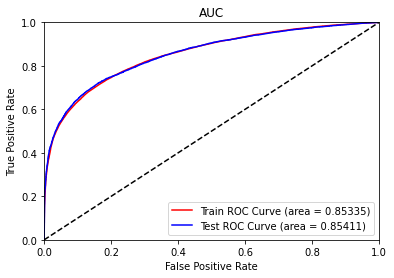

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## GBDT

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(random_state=0, n_estimators=10, max_depth=10)
gbdt = gbdt.fit(x_train, y_train)
y_pred_test = gbdt.predict_proba(x_test)[:, 1]
y_pred_train = gbdt.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7515727307741688
f1_score: 0.8036655054656531
accuracy_score: 0.816350444637067
AUC: 0.8934285595601786
Predicted      0      1    All
True                          
0          11213   8701  19914
1          11324   8573  19897
All        22537  17274  39811
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7122066208875679
f1_score: 0.7600765654908396
accuracy_score: 0.7746674200010273
AUC: 0.8496263887085502
Predicted     0     1   All
True                       
0          1109   886  1995
1          1124   891  2015
All        2233  1777  4010
------------------------------------------


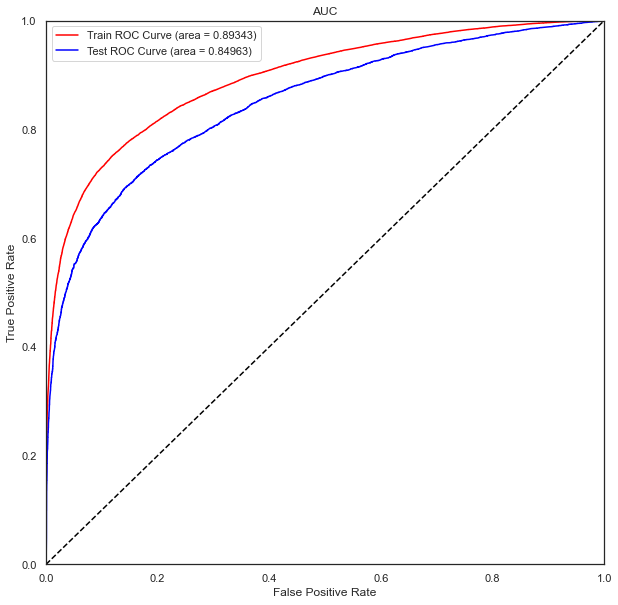

In [66]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## LightGBM

In [107]:
import lightgbm as gbm
from lightgbm import LGBMClassifier

In [108]:
gbm_clf = gbm.LGBMClassifier(
    boosting_type = 'gbdt',
    #num_leaves = ,
    #max_depth = ,
    learning_rate = 0.1
    #n_estimators = 
    #,subsample_for_bin =
    ,objective = 'binary'
    ,metric = 'binary_logloss'
    #,class_weight = 
    #,min_split_gain =
    #,min_split_weight =
    #,min_child_weight =
    #,min_child_samples =
    #,subsample =
    #,subsample_freq =
    #,colsample_bytree =
    ,reg_alpha = 5
    ,reg_lambda = 120
    ,importance_type = 'split' #will rank features by # of times it is used in model.'gain' for gain
    ,num_iterations = 1000
)

In [109]:
gbm_clf.fit(
    x_train, 
    y_train, 
    eval_metric = 'result', 
    verbose = True, 
    eval_set = [(x_val, y_val)],
    early_stopping_rounds = 20
)

[1]	valid_0's binary_logloss: 0.662348
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.637353
[3]	valid_0's binary_logloss: 0.615892
[4]	valid_0's binary_logloss: 0.597688
[5]	valid_0's binary_logloss: 0.582505
[6]	valid_0's binary_logloss: 0.569258
[7]	valid_0's binary_logloss: 0.55816
[8]	valid_0's binary_logloss: 0.548532
[9]	valid_0's binary_logloss: 0.539825
[10]	valid_0's binary_logloss: 0.532286
[11]	valid_0's binary_logloss: 0.52577
[12]	valid_0's binary_logloss: 0.519981
[13]	valid_0's binary_logloss: 0.515134
[14]	valid_0's binary_logloss: 0.510994
[15]	valid_0's binary_logloss: 0.507042
[16]	valid_0's binary_logloss: 0.50359
[17]	valid_0's binary_logloss: 0.500632
[18]	valid_0's binary_logloss: 0.497876
[19]	valid_0's binary_logloss: 0.49563
[20]	valid_0's binary_logloss: 0.493652
[21]	valid_0's binary_logloss: 0.491747
[22]	valid_0's binary_logloss: 0.4902
[23]	valid_0's binary_logloss: 0.488692
[24]	valid_0's binary_logloss: 0.4

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=1000, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=5,
               reg_lambda=120, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [54]:
y_pred_test = gbm_clf.predict_proba(x_test)[:, 1]
y_pred_train = gbm_clf.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7247920665387076
f1_score: 0.770344933104398
accuracy_score: 0.7831516766457454
AUC: 0.8630115360217185
Predicted      0      1    All
True                          
0          11015   8740  19755
1          11121   8919  20040
All        22136  17659  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7157407407407408
f1_score: 0.7611597374179432
accuracy_score: 0.7757345387302239
AUC: 0.853773792999218
Predicted     0     1   All
True                       
0          1091   882  1973
1          1135   902  2037
All        2226  1784  4010
------------------------------------------


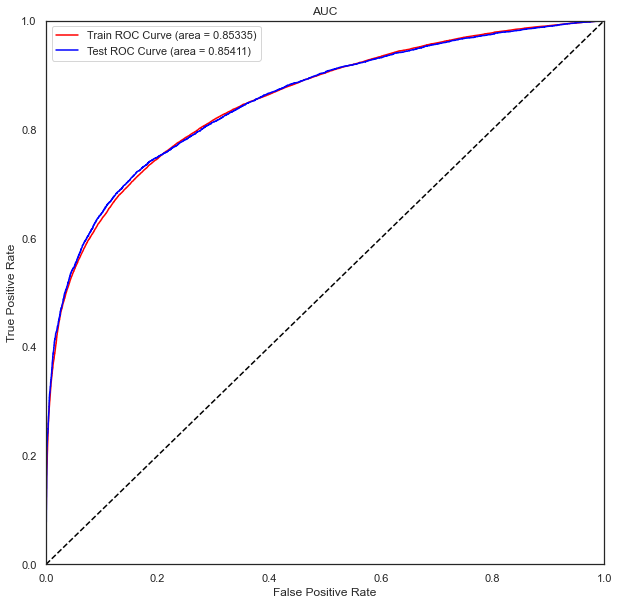

In [110]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## GridSearch for GBDT

In [111]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                               min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.32538543, 1.89380035, 2.47538829, 2.98179235, 3.5398037 ,
         4.12919822, 4.63930659]),
  'std_fit_time': array([0.03889608, 0.02579396, 0.02366507, 0.06919284, 0.10178732,
         0.06592678, 0.0537543 ]),
  'mean_score_time': array([0.04561749, 0.04720511, 0.05919404, 0.06441445, 0.07180109,
         0.08361435, 0.08692303]),
  'std_score_time': array([0.01460292, 0.00039702, 0.00487201, 0.00100702, 0.00132823,
         0.00927824, 0.00326713]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.84731079, 0.84979652, 0.85103372, 0.85197477, 0.85263569,
         0.85299489, 0.8531087 ]),
  'spl

In [112]:
param_test1 = {'n_estimators':range(80,151,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                               min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([4.64361835, 5.13062172, 5.66787639, 6.19273343, 6.72101607,
         7.27307591, 7.79701047, 8.74241862]),
  'std_fit_time': array([0.03414646, 0.11800037, 0.0731966 , 0.12261328, 0.17383439,
         0.16389111, 0.07250512, 0.3989696 ]),
  'mean_score_time': array([0.08697863, 0.09180603, 0.09779897, 0.10341878, 0.11660056,
         0.11560607, 0.12040043, 0.12919893]),
  'std_score_time': array([0.00109128, 0.00271011, 0.00074137, 0.00049959, 0.00847716,
         0.00233217, 0.00100669, 0.00213085]),
  'param_n_estimators': masked_array(data=[80, 90, 100, 110, 120, 130, 140, 150],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 80},
   {'n_estimators': 90},
   {'n_estimators': 100},
   {'n_estimators': 110},
   {'n_estimators': 120},
   {'n_estimators': 130},
   {'n_estimators': 140},
   {'n_estimators': 150}],
  'split0_test_score': array([0.853

In [114]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.1, 
        n_estimators=120, 
        min_samples_leaf=20,
        max_features='sqrt', 
        subsample=0.8, 
        random_state=10
    ), 
    param_grid = param_test2, 
    scoring='roc_auc',
    iid=False, 
    cv=5)
gsearch2.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 3.45556402,  3.61038938,  3.72701602,  3.67620912,  5.08439488,
          5.28479586,  5.2830235 ,  4.97647386,  6.7170043 ,  6.26970787,
          5.97208714,  5.83681006,  8.37736716,  7.60057206,  7.70422783,
          7.66988192, 10.5684083 ,  9.56854734,  8.91962228,  8.798598  ,
         12.91343093, 12.09202356, 10.35147781,  9.29873238]),
  'std_fit_time': array([0.1250714 , 0.05000499, 0.08158398, 0.12801082, 0.08381246,
         0.25093659, 0.13585953, 0.17017597, 0.38197038, 0.16975322,
         0.12140917, 0.13991024, 0.43689841, 0.26756902, 0.451388  ,
         0.34377249, 0.16163023, 0.13505017, 0.10145558, 0.16877364,
         0.27428557, 0.96775998, 1.02669756, 0.15228346]),
  'mean_score_time': array([0.05162759, 0.06540051, 0.05380282, 0.05259786, 0.08100562,
         0.07601733, 0.08438973, 0.07564855, 0.11180573, 0.10120153,
         0.09640412, 0.09418507, 0.13622217, 0.12282095, 0.131393  ,
         0.12900147, 0.16540813, 0.16740503, 0.

In [116]:
param_test3 = {'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.1, 
        n_estimators=120,
        max_depth=7,
        min_samples_split=700,
        max_features='sqrt', 
        subsample=0.8, 
        random_state=10
    ), 
    param_grid = param_test3, 
    scoring='roc_auc',
    iid=False, 
    verbose=1,
    cv=5
)

gsearch3.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.7min finished


({'mean_fit_time': array([6.06449895, 6.34776134, 6.46800838, 6.06420708, 6.41620145]),
  'std_fit_time': array([0.1295597 , 0.08398248, 0.31314299, 0.35224719, 0.3227051 ]),
  'mean_score_time': array([0.10140619, 0.10560927, 0.11020746, 0.10400147, 0.10178876]),
  'std_score_time': array([0.01030432, 0.0075005 , 0.01550756, 0.00918721, 0.00205163]),
  'param_min_samples_leaf': masked_array(data=[60, 70, 80, 90, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 60},
   {'min_samples_leaf': 70},
   {'min_samples_leaf': 80},
   {'min_samples_leaf': 90},
   {'min_samples_leaf': 100}],
  'split0_test_score': array([0.85278824, 0.85324258, 0.85328524, 0.85319134, 0.85283255]),
  'split1_test_score': array([0.85619283, 0.85620537, 0.85633786, 0.85643664, 0.85641502]),
  'split2_test_score': array([0.85210429, 0.85168207, 0.85245235, 0.8522972 , 0.85226799]),
  'split3_test_score': array([0.8

In [16]:
gbdt_best = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=100,
    max_depth=9, 
    min_samples_leaf =80, 
    min_samples_split =700, 
    max_features='sqrt', 
    subsample=0.8, 
    random_state=10
)
gbdt_best.fit(df.drop(columns = ['result','duration']),df['result'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=80, min_samples_split=700,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
y_pred_test = gbdt_best.predict_proba(x_test)[:, 1]
y_pred_train = gbdt_best.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7176787777635126
f1_score: 0.7702642185400805
accuracy_score: 0.7859000288933834
AUC: 0.8671379869262116
Predicted      0      1    All
True                          
0          11315   8599  19914
1          11361   8536  19897
All        22676  17135  39811
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7218407297324998
f1_score: 0.7745518530737929
accuracy_score: 0.7894088037392778
AUC: 0.871171321641422
Predicted     0     1   All
True                       
0          1128   867  1995
1          1127   888  2015
All        2255  1755  4010
------------------------------------------


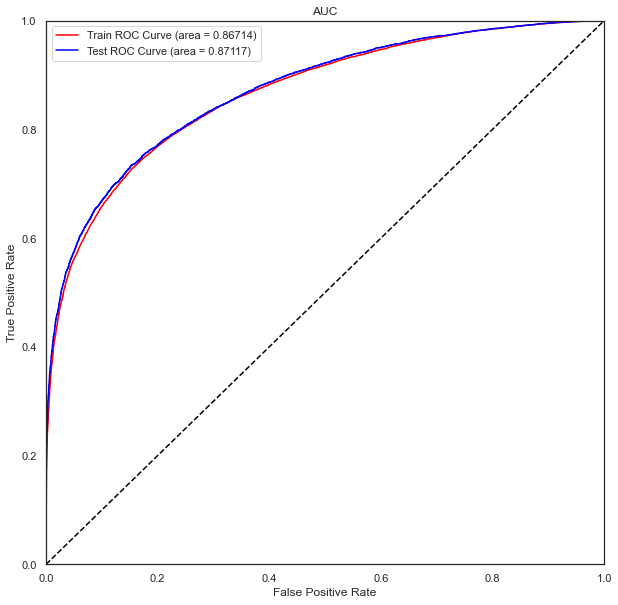

In [18]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## Features importance

In [19]:
gbdt_importance = gbdt_best.feature_importances_

Text(0.5, 0, 'Relative Importance: Gini')

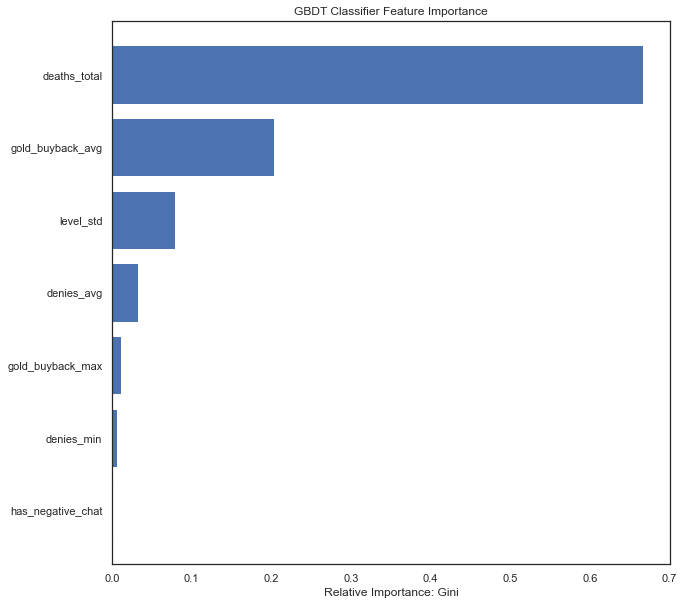

In [122]:
from matplotlib.pyplot import figure
figure(num=None, figsize = (10,10))
indices = np.argsort(gbdt_importance)
plt.figure(1)
plt.title('GBDT Classifier Feature Importance')
plt.barh(range(len(indices)), gbdt_importance[indices], color = 'b', align = 'center')
gbdt_feat_names = x_train.columns
plt.yticks(range(len(indices)), gbdt_feat_names[indices])
plt.xlabel('Relative Importance: Gini')

## Logistic Regression for predicting probabilities

In [79]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.1, 0.2, 0.3],
                           Cs = 20,
                           n_jobs = -1,
                           random_state = 0,
                           class_weight = 0.9
)
lr.fit(x_train,y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter wa

LogisticRegressionCV(Cs=20, class_weight=0.9, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=[0.1, 0.2, 0.3], max_iter=100,
                     multi_class='warn', n_jobs=-1, penalty='elasticnet',
                     random_state=0, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [80]:
y_pred_test = lr.predict_proba(x_test)[:, 1]
y_pred_train = lr.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.5398912348048625
f1_score: 0.6377824805381301
accuracy_score: 0.6922805271521904
AUC: 0.7677302786258187
Predicted      0      1    All
True                          
0          12899   6856  19755
1          13041   6999  20040
All        25940  13855  39795
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.5417695473251029
f1_score: 0.6383030303030303
accuracy_score: 0.6934456544072324
AUC: 0.7677087607714403
Predicted     0     1   All
True                       
0          1280   693  1973
1          1292   745  2037
All        2572  1438  4010
------------------------------------------


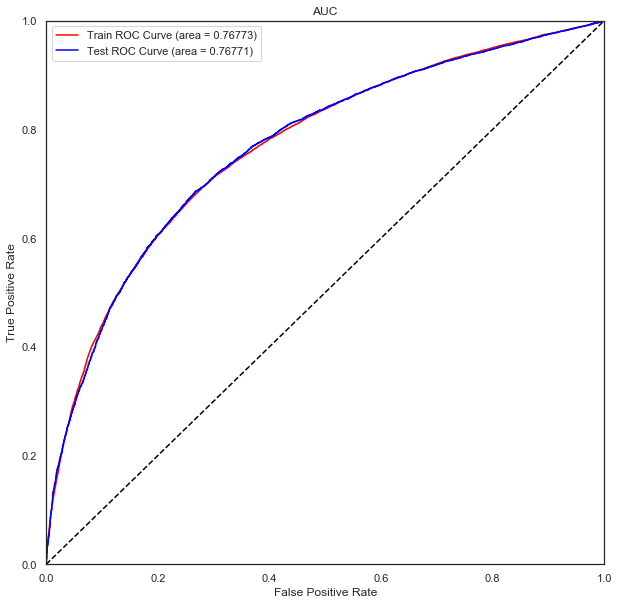

In [81]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)